In [1]:
%matplotlib inline

In [2]:
import datetime
import pandas as pd
import numpy as np
import spiceypy
from matplotlib import pyplot as plt

![SoftUni logo](logo-softuni.png)

<div class="space" style="height:50px; padding-top:25px">
    <center><h3>Проект на тема:</h3></center>
</div>


<div class="space" style="height:100px; padding-top:25px">
    <center><h1>Барицентър на Слънчевата система</h1></center>
</div>

<div class="space" style="height:50px">
    <center><h4>Math Concepts for Developers</h4></center>
</div>

<div class="element" style="float:right; margin-right:50px">
    <p><b>Дата:</b> 15 май 2021 г.</p>
    <p><b>Изготвил:</b> Калин Петров</p>
</div>

### 1. Въведение
Едно от най-масовите заблуждения свързани с космоса е, че **планетите от слънчевата система обикалят около Слънцето**. 

Ако попитаме 100 човека, случайно срещнати на улицата, вероятността $P$ всички те да отговорят, че осемте планети обикалят около Слънцето е много близка до 1. Истината е, че в действителност това не е така! Слънцето, планетите, луните, астероидите и другите астрономически тела в Слънчевата система обикалят около една постоянно изместваща се обща гравитационна точка - наречена [**Барицентър**](#https://en.wikipedia.org/wiki/Barycenter).
Когато едно от телата в една гравитационно свързана система е много по-масивно от останалите, барицентърът се намира в самото тяло и гледано от страни то се поклаща леко, а не обикаля около другите тела. Чрез това леко движение на звездите, в наши дни учените откриват **екзопланети** - планети в чужди слънчеви системи.

### 2. Задача
Слънцето притежава повече от 99.86% от масата на Слънчевата система ($ \approx 1.989\times10^{30} kg $), но в същото време Слънчевата система е и много, много голяма. Задачата на този проект е, <u>да се провери дали барицентъра на Слънчевата система се намира винаги в обема на Слънцето</u> или излиза извън неговите граници. Единствено в случай, че той не излиза извън Слънцето, само тогава можем да кажем, че планетите обикалят около него. 

Такъв е случаят със Земята и Луната - барицентъра между тези две тела е винаги под повърхността на Земята, затова е напълно коректно да кажем, че Луната обикаля около Земята. 

Нека, все пак да не взимаме това за даденост, а сами да го проверим.

### 3. Какво е барицентър и как се изчислява
Както вече споменахме, барицентър се нарича *точка в пространството, около която обикалят обектите, които са гравитационно зависими*. Могат да бъдат два обекта (например Земя - Луна), а могат и да са съвкупност от обекти - Слънчевата система.

Когато имаме само две тела, които са гравитационно обвързани, формулата за намиране на общия им барицентър е следната:

Центъра на масата (барицентър) ще означим с $ x_{CM} $

$$ x_{CM} = \frac {\sum md}{\sum m} = \frac {(M)(0) + m(R)}{M+m} = $$

> където **M** е масата на Земята, която е $ \approx 5.98\times10^{24} kg $ <br>
> **m** е масата на Луната, която е $ \approx 7.35\times10^{22} kg $ <br> 
> а **R** е разстоянието от Земята до Луната, равняващо се на $ \approx 3.85\times10^5 km $ <br> 
> а понеже отправната ни точка ще бъде центъра на Земята, разстоянието $d$ при калкулацията за Земята, ще бъде равно на 0.

<br>и така получаваме:

$$ = \frac{5.98\times10^{24}(0) + 7.35\times10^{22}(3.85\times10^5)} {5.98\times10^{24} + 7.35\times10^{22}} = $$
<br>
$$ = \frac{0 + 2.82975\times10^{28} } {6.0535\times10^{24}} = $$
<br>
$$ = 4674.56843149 $$

Тоест, барицентъра между двете тела ще бъде отдалечен на $\approx$ 4675 km от центъра на Земята. Но тъй като радиуса на Земята е $\approx$ 6371 km, то следователно **барицентъра на системата Земя - Луна ВИНАГИ е в пределите на планетата Земя**.

![Барицентър на системата Земя-Луна](earth-moon.gif)<center>*Барицентър на системата Земя-Луна*</center>

### 4. Решение на поставената задача

Намирането на барицентъра на Слънчевата система е доста по-сложна задача от намирането на барицентъра между Земята и Луната, тъй като участват огромен брой гравитационно свързани тела - всички астрономически обекти в системата. 

За да отговорим на въпроса дали той се намира винаги в рамките на Слънцето - ще открием барицентъра на Слънчевата система и ще го съпоставим с центъра на Слънцето за определен период от време (нека бъдат 15 000 дни).

За целта на нашия проект ще използваме и няколко SPICE kernel файла от каталога с данни **NAIF на NASA**, които за улеснение съм свалил и прикачил в папката на този проект. 

Все пак, оригиналните файлове могат да се свалят от следните линкове:

- **SPK файл** (*de432s.bsp*), установяващ местоположението на даден космически обект в определено време: [Свали от тук](https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/de432s.bsp)

- **PCK файл** (*pck00010.tpc*), съдържащ различни физични характеристики на обектите като размер, форма, наклон на оста и др.: [Свали от тук](https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/pck00010.tpc)

- **LCK файл** (*naif0012.tls*), отговарящ за калкулациите, свързани с времето и неговото преобразуване: [Свали от тук](https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls)

In [3]:
# importing kernel files
spiceypy.furnsh('naif0012.tls')
spiceypy.furnsh('de432s.bsp')
spiceypy.furnsh('pck00010.tpc')

Ще зададем като първоначално време началото на текущата *Юлианска епоха* **J2000** - 01 януари 2000 г., 00:00 часа. Като крайно време добавяме 15 000 дни към тази дата чрез функцията **datetime.timedelta** и така получаваме:

In [4]:
initial_time = datetime.datetime(year=2000, month=1, day=1, hour=0, minute=0, second=0)
days = 15000
end_time = initial_time + datetime.timedelta(days=days)

Тъй като от научнна гледна точка има известна промяна в скоростта на въртене на Земята, която е изключително незначителна, но реално един ден не винаги е абсолютно точно 86 400 секунди $ (24 часа \times 60 минути \times 60 секунди)$, а може да има съвсем леко отклонение. За да работим с по-точни данни, а и NASA работи с Ephemeris time (Ефемеридно време), ще конвертираме времето от секунди в ET секунди. 

За целта, ще превърнем в *string* началната и крайната дата и след това с помощта на функцията SPICE [**utcstr**](https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/utc2et_c.html) ще преобразуваме изследвания период от UTC секунди в ET секунди. Това ще улесни калкулациите по-долу и ще ги направи изключително точни.

In [5]:
initial_time_string = initial_time.strftime('%Y-%m-%dT%H:%M:%S')
end_time_string = end_time.strftime('%Y-%m-%dT%H:%M:%S')

print('Initial time: %s' % initial_time_string)
print('End time: %s\n' % end_time_string)

Initial time: 2000-01-01T00:00:00
End time: 2041-01-25T00:00:00



Преобразуваме UTC времевия период в Ефемеридно време (ET) чрез **utcstr**

In [6]:
initial_time_et = spiceypy.utc2et(initial_time_string)
end_time_et = spiceypy.utc2et(end_time_string)

Нека демонстрираме разликата между стандартните UTC секунди и ЕТ секундите. Чрез следващите изчисления получаваме само 5 секунди разлика за период от 41 години. Не са много, но в космическото пространство изчисленията трябва да са абсолютно точни, защото разстоянията са много големи и всяко малко отклонение може да доведе до огромни разлики.

In [7]:
utc_seconds = 15000 * 24 * 60 * 60
print('Expected seconds between start date and end date: %s\n' % utc_seconds)
print('Covered time interval in seconds: %s\n' % round(end_time_et - initial_time_et))

Expected seconds between start date and end date: 1296000000

Covered time interval in seconds: 1296000005



Накрая създаваме NumPy масив, съдържащ 15 000 времеви момента между началната и крайната дата.

In [8]:
time_interval = np.linspace(initial_time_et, end_time_et, days)

Сега да намерим координатите на барицентъра на Слънчевата система във всеки даден момент от времевия период. За целта ще използваме SPICE функцията **spkgps**, която ще ни даде координатите му по x, y и z спрямо центъра на Слънцето. 
Тази функция се нуждае от следните параметри:

- **targ:** Target body. NAIF кода на барицентъра на Слънчевата система, който е 0
- **et:** Target epoch. Oпределен момент от ефемеридното време
- **ref:** Target reference frame. Референция за използваното време. В нашия случай използваме ECLIPJ2000
- **obs:** Observing body. Naif кода на Слънцето, който е 10

Като изходни данни, функцията **spkgps** връща *Position of target* и *Light time*. Тъй като се интересуваме само от текущата позиция на Слънцето, пренебрегваме втората част от данните. 

Ще създадем един празен лист **barycenter_data**, в който ще добавим всички позиции на барицентъра спрямо центъра на Слънцето по координатите x, y, и z, за всеки от нашите 15 000 времеви периода, като ще оставим функцията да направи това за нас. Накрая създаваме нов NumPy масив с получените данни.

In [9]:
barycenter_data = []

for each_interval in time_interval:
    barycenter_position, _ = spiceypy.spkgps(targ=0, et=each_interval, ref='ECLIPJ2000', obs=10)
    barycenter_data.append(barycenter_position)

barycenter_data = np.array(barycenter_data)

Нека принтираме резултатите за първоначално взетия момент, нулевия елемент от нашия масив, за да направим проверка на получените данни. Ще използваме функцията на NumPy [linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html?highlight=linalg%20norm#numpy.linalg.norm), която ще изчисли евклидовото разстояние спрямо получените координати и центъра на Слънцето.

In [10]:
print('Initial position of the barycentre compared to Sun\'s center:\nX = %s km, Y = %s km, Z = %s km' % tuple(np.round(barycenter_data[0])))
print('\nDistance between the barycentre and centre of the Sun (at initial time): d = %s km\n' % round(np.linalg.norm(barycenter_data[0])))

Initial position of the barycentre compared to Sun's center:
X = 1068000.0 km, Y = 417681.0 km, Z = -30845.0 km

Distance between the barycentre and centre of the Sun (at initial time): d = 1147185 km



Получихме, че разстоянието на барицентъра на Слънчевата система от центъра на Слънцето в първоначалния момент е над 1 милион километра.

Преди да продължим с калкулациите, трябва да си отговорим на един въпрос. Колко километра е радиуса на Слънцето? 
Отговорът на този въпрос е сложен. Различните методи за измерването му се отличават с приблизително сходни резултати. Ще използваме стойността 696 000 км, както е записана в kernel файла на NASA's NAIF project. 

Чрез функцията [bodvcd](https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/bodvcd_c.html) можем да извлечем тази стойност за Слънцето. Функцията се нуждае от 3 параметъра:
- bodyid: NAIF кода на Слънцето, който е 10.
- item: "RADII" показва какво точно искаме да извлечем. RADII ще ни даде стойността за радиус на желания обект.
- maxn: Броя очаквани параметри. Тъй като Слънцето е елипсоид, очакваме координати x, y и z, затова стойността, която въвеждаме е 3.

Като изходни данни **bodvcd** ще ни даде Number of values returned (нещо, което не ни трябва) и стойностите за радиус на Слънцето, които всъщност са еднакви, затова ще вземем само първата от тях (в случая от получените x, y и z, то х ще бъде стойността на радиуса, която търсим (или 696 000 km). 

Накрая ще създадем константата **SUN_RADIUS**, която ще ползваме и като мерна единица.

In [11]:
_, sun_radius = spiceypy.bodvcd(bodyid=10, item='RADII', maxn=3)

SUN_RADIUS = sun_radius[0]

# Scale data using the Sun's radius
baricenter_coordinates = barycenter_data / SUN_RADIUS

Ще изпозлваме **mathplotlib** за да визуализираме траекторията на барицентъра спрямо позицията на Слънцето. Тъй като създаваме двуизмерно изображение, ще ни трябват само координатите x и y.

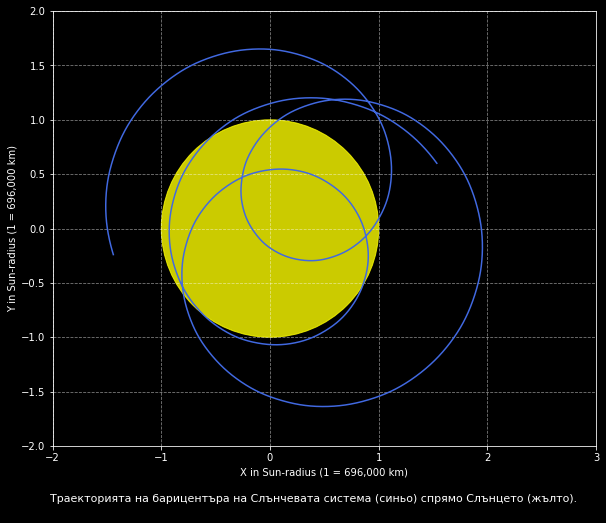

In [29]:
barycenter_xy = baricenter_coordinates[:, 0:2]

plt.style.use('dark_background')
FIG, AX = plt.subplots(figsize=(12, 8))

# Plot the Sun
sun = plt.Circle((0.0, 0.0), 1.0, color='yellow', alpha=0.8)
AX.add_artist(sun)

# Plot the barycenter movement
AX.plot(barycenter_xy[:, 0], barycenter_xy[:, 1], ls='solid', color='royalblue')

txt="Траекторията на барицентъра на Слънчевата система (синьо) спрямо Слънцето (жълто).\n"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)

AX.set_aspect('equal')
AX.grid(True, linestyle='dashed', alpha=0.5)
AX.set_xlim(-2, 3)
AX.set_ylim(-2, 2)
AX.set_xlabel('X in Sun-radius (1 = 696,000 km)')
AX.set_ylabel('Y in Sun-radius (1 = 696,000 km)')

# Saving the image as a file.
plt.savefig('barycenter-and-the-Sun.png', dpi=300)

Това, което се вижда ясно е, че барицентъра не винаги се намира в обема на Слънцето. Виждаме, че неговата траектория доста често е извън него. А какъв процент от времето барицентъра на Слънчевата система се намира извън Слънцето?

Нека изчислим колко от 15 000-те дни, барицентъра на Слънчевата система се е оказал извън пределите на Слънцето. Трябва да изчислим евклидовото разстояние между барицентъра и Слънцето, отново с функцията **linalg.norm**. Можем лесно да засечем дните в които барицентъра е бил на повече от 1 слънчев радиус от центъра на Слънцето. 

In [30]:
barycenter_distance = np.linalg.norm(baricenter_coordinates, axis=1)
print('Calculation for: %s days\n' % days)

# Number of days barycenter was outside the Sun
days_outside_sun = len(np.where(barycenter_distance > 1)[0])

print('Days the barycenter is outside the Sun: %s %%' % (100 * days_outside_sun / days))

Calculation for: 15000 days

Days the barycenter is outside the Sun: 62.46666666666667 %


### 4. Заключение


Общо в над 62% от времето барицентърът на Слънчевата система е бил извън пределите на самото Слънце. Сега можем директно да отговорим на поставения въпрос в началото на този проект - Не, барицентърът на Слънчевата система не винаги е в пределите на Слънцето. Дори в по-голямата част от времето той е извън него. 
**Затова можем да заключим, че планетите в Слънчевата система на практика НЕ обикалят около Слънцето.**

**Обобщение:** За всички модели, които не изискват изключителна точност - Слънцето може да бъде поставено в центъра на нашата Слънчева система, но трябва да имаме предвид, че реално това не е точно така.

### 5. Допълнение

След съставянето на проекта направих допитване до 27 човека (мои приятели), на които през различни социални канали Facebook, Viber, LinkedIn зададох въпроса: "Обикалят ли 8-те планети от Слънчевата система около Слънцето?"

Възможните отговори бяха три: "Да", "Не", "Не знам"

Противно на очакваното от мен, че вероятността отговор "Да" да е близо до 1, на практика се оказа, че това не е така и моето предположение в началото на този проект се оказа грешно. 

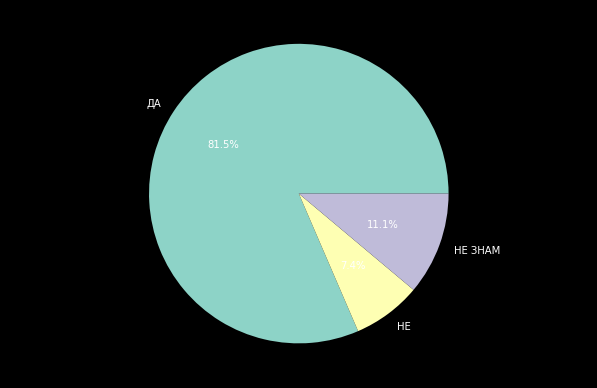

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.35,1.3])
ax.axis('equal')
langs = ['ДА', 'НЕ', 'НЕ ЗНАМ',]
students = [22,2,3]
ax.pie(students, labels = langs,autopct='%1.1f%%')
plt.show()

### 6. Използвани ресурси

1. Astrophysics: Binary Star System (6 of 40) What is the Barycenter? [Youtube](https://www.youtube.com/watch?v=Qj2AHHvz1Kw)
2. Astrophysics: Binary Star System (8 of 40) The Barycenter: A General Approach [Youtube](https://www.youtube.com/watch?v=Lp4u2L8HNPI)
3. NASA NAIF Directory with kernel files [naif.jpl.nasa.gov](https://naif.jpl.nasa.gov/pub/naif/generic_kernels/)
4. SpiceyPy documentation [spiceypy.readthedocs.io](https://spiceypy.readthedocs.io/en/main/)
5. A look at Kepler’s first law [towardsdatascience.com](https://towardsdatascience.com/space-science-with-python-2-a-look-at-keplers-first-law-84caa6c75a35)
6. Ephemeris time [wikipedia.org](https://en.wikipedia.org/wiki/Ephemeris_time)
7. Barycenter [wikipedia.org](https://en.wikipedia.org/wiki/Barycenter)